

## This is an example python code to create and insert data into Cosmos DB using Python SQL API

Pre-Requisites
1. Working Azure subscription
2. Python 3.x
3. IDE to write python code

### Follow the guide here to create a Cosmos DB account with Core SQL API
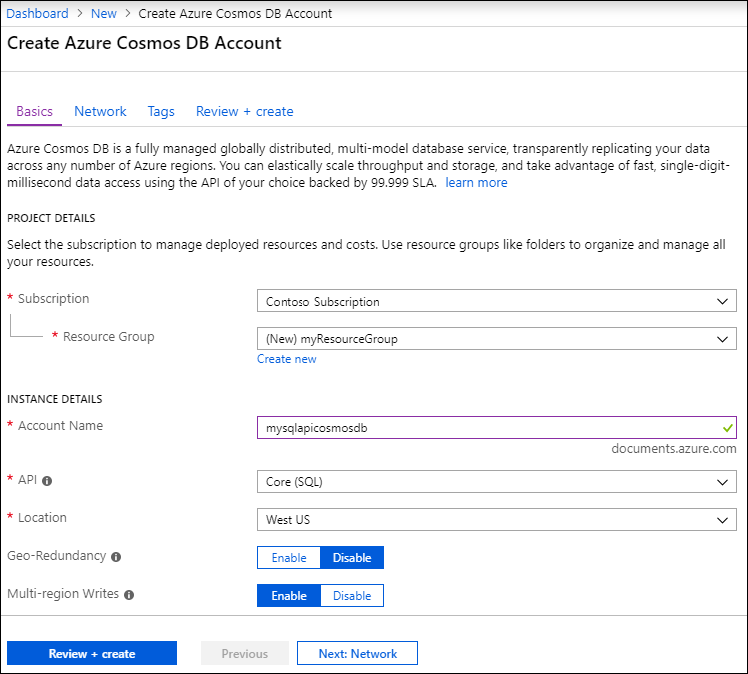


### Lets install the python module to interact with cosmos db

In [ ]:
pip install azure-cosmos

## Using "az cli" or the cloudshell run the below listed commands to set the Account URI and Key


RES_GROUP="suresh_data_ai"
ACCT_NAME="susethurcassandra"

export ACCOUNT_URI=$(az cosmosdb show --resource-group $RES_GROUP --name $ACCT_NAME --query documentEndpoint --output tsv)
export ACCOUNT_KEY=$(az cosmosdb list-keys --resource-group $RES_GROUP --name $ACCT_NAME --query primaryMasterKey --output tsv)

Output should look like

suresh@Azure:~$ echo $ACCOUNT_URI
https://susethurcassandra.documents.azure.com:443/
suresh@Azure:~$ echo $ACCOUNT_KEY
#######################################


## Creating the Cosmos Client

In [ ]:
import azure.cosmos.cosmos_client as cosmos_client
import azure.cosmos.errors as errors
import azure.cosmos.http_constants as http_constants

import os
url = os.environ['ACCOUNT_URI']
key = os.environ['ACCOUNT_KEY']
client = cosmos_client.CosmosClient(url, {'masterKey': key})

### Lets create a database in Azure cosmos DB

In [ ]:
database_name = 'testDatabase'
try:
    database = client.CreateDatabase({'id': database_name})
except errors.HTTPFailure:
    database = client.ReadDatabase("dbs/" + database_name)

### Let's create a container(collection of documents)

In [ ]:
import azure.cosmos.documents as documents
container_definition = {'id': 'products',
                        'partitionKey':
                                    {
                                        'paths': ['/productName'],
                                        'kind': documents.PartitionKind.Hash
                                    }
                        }
try:
    container = client.CreateContainer("dbs/" + database['id'], container_definition, {'offerThroughput': 400})
except errors.HTTPFailure as e:
    if e.status_code == http_constants.StatusCodes.CONFLICT:
        container = client.ReadContainer("dbs/" + database['id'] + "/colls/" + container_definition['id'])
    else:
        raise e

### Let us receive the existing container which we just created

In [ ]:
database_id = 'testDatabase'
container_id = 'products'
container = client.ReadContainer("dbs/" + database_id + "/colls/" + container_id)

### Lets inser data into the container, each record should have a unique id 

In [ ]:
for i in range(1, 10):
    client.UpsertItem("dbs/" + database_id + "/colls/" + container_id, {
            'id': 'item{0}'.format(i),
            'productName': 'Widget',
            'productModel': 'Model {0}'.format(i)
        }
    )